In [36]:
# ============================================================
# INSTALL & IMPORT LIBRARIES
# ============================================================
!pip install tensorflow numpy pandas scikit-learn

import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [37]:
# ============================================================
# LOAD DATASET
# ============================================================
df = pd.read_csv("healthcare-dataset-stroke-data.csv")  # pastikan nama file benar
print(df.head())

      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  


In [38]:
# ============================================================
# DROP KOLOM YANG TIDAK DIPAKAI
# ============================================================
df = df.drop(columns=["id"])

In [39]:
# ============================================================
# HANDLE MISSING VALUES
# ============================================================
df["bmi"].fillna(df["bmi"].median(), inplace=True)

/tmp/ipython-input-3734745146.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["bmi"].fillna(df["bmi"].median(), inplace=True)


In [40]:
# ============================================================
# ONE-HOT ENCODING
# ============================================================
df = pd.get_dummies(df, drop_first=True)
print("\nColumns after encoding:\n", df.columns)


Columns after encoding:
 Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke', 'gender_Male', 'gender_Other', 'ever_married_Yes',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Urban',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes'],
      dtype='object')


In [41]:
# ============================================================
# SPLIT FITUR & LABEL
# ============================================================
X = df.drop("stroke", axis=1)
y = df["stroke"]

In [42]:
# ============================================================
# TRAIN-TEST SPLIT
# ============================================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [43]:
# ============================================================
# NORMALISASI
# ============================================================
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pickle.dump(scaler, open("scaler.pkl", "wb"))
print("Scaler saved as scaler.pkl")

Scaler saved as scaler.pkl


In [44]:
# ============================================================
# BUILD MODEL ANN
# ============================================================
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 417 (1.63 KB)

 Trainable params: 417 (1.63 KB)

 Non-trainable params: 0 (0.00 B)

In [45]:
# ============================================================
# TRAIN ANN
# ============================================================
history = model.fit(
    X_train_scaled, y_train,
    epochs=30,
    batch_size=16,
    validation_split=0.2,
    verbose=1
)

Epoch 1/30
205/205 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9562 - loss: 0.3663 - val_accuracy: 0.9425 - val_loss: 0.2181
Epoch 2/30
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9468 - loss: 0.1979 - val_accuracy: 0.9425 - val_loss: 0.1925
Epoch 3/30
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9524 - loss: 0.1635 - val_accuracy: 0.9425 - val_loss: 0.1824
Epoch 4/30
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9549 - loss: 0.1533 - val_accuracy: 0.9425 - val_loss: 0.1782
Epoch 5/30
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9556 - loss: 0.1483 - val_accuracy: 0.9425 - val_loss: 0.1765
Epoch 6/30
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9537 - loss: 0.1567 - val_accuracy: 0.9425 - val_loss: 0.1756
Epoch 7/30
205/205 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9520 - loss: 0.1464 - val_accuracy: 0.9425 - val_loss: 0.1730
Epoch 8/30
205/205 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9526 - loss: 0.1515 - val_accuracy: 0

In [46]:
# ============================================================
# EVALUASI ANN
# ============================================================
y_pred_ann = (model.predict(X_test_scaled) > 0.5).astype("int32")

print("\nAccuracy ANN:", accuracy_score(y_test, y_pred_ann))
print("\nClassification Report ANN:\n", classification_report(y_test, y_pred_ann))
print("\nConfusion Matrix ANN:\n", confusion_matrix(y_test, y_pred_ann))

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step

Accuracy ANN: 0.9510763209393346

Classification Report ANN:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022


Confusion Matrix ANN:
 [[972   0]
 [ 50   0]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


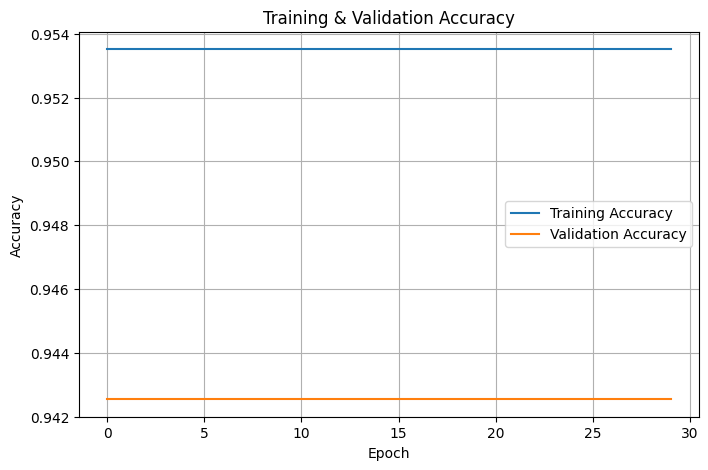

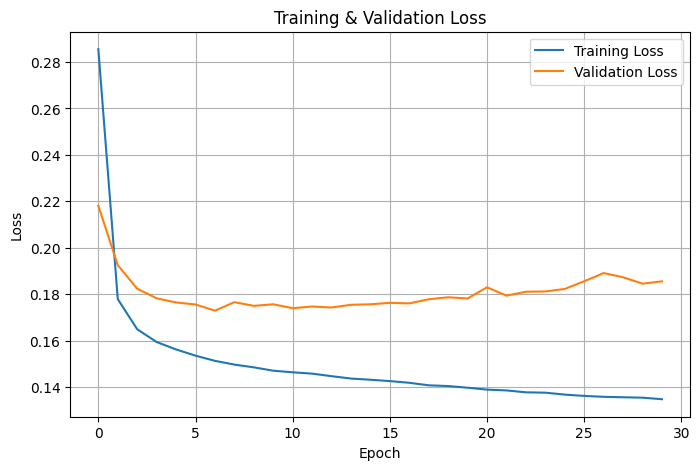

In [47]:
# ============================================================
# GRAFIK TRAINING ACCURACY & LOSS
# ============================================================

# --- Accuracy Plot ---
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# --- Loss Plot ---
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [48]:
# ============================================================
# SIMPAN MODEL ANN
# ============================================================
model.save("stroke_ann.h5")
print("Model saved as stroke_ann.h5")

Model saved as stroke_ann.h5


In [49]:
# ============================================================
# TRAIN LOGISTIC REGRESSION (Pembanding)
# ============================================================
logreg = LogisticRegression(max_iter=2000)
logreg.fit(X_train_scaled, y_train)

y_pred_log = logreg.predict(X_test_scaled)

In [50]:
# ============================================================
# EVALUASI LOGISTIC REGRESSION
# ============================================================
print("\nAccuracy Logistic Regression:", accuracy_score(y_test, y_pred_log))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_log))


Accuracy Logistic Regression: 0.952054794520548

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98       972
           1       1.00      0.02      0.04        50

    accuracy                           0.95      1022
   macro avg       0.98      0.51      0.51      1022
weighted avg       0.95      0.95      0.93      1022


Confusion Matrix:
 [[972   0]
 [ 49   1]]


In [51]:
# ============================================================
# SIMPAN MODEL LOGISTIC REGRESSION
# ============================================================
pickle.dump(logreg, open("logistic_model.pkl", "wb"))
print("Model logistic regression saved as logistic_model.pkl")

Model logistic regression saved as logistic_model.pkl


In [52]:
# ============================================================
# END
# ============================================================
print("\nSEMUA PROSES SELESAI ✔")


SEMUA PROSES SELESAI ✔
